Leonardo Coronado Arvayo

# Learning rate and batch size

In [2]:
import keras
from keras import models
from keras import layers
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np
from keras.utils import to_categorical
from keras.datasets import mnist


## Leer el conjunto de datos

Leer el conjunto mnist pero quedarse solo con los primeros 10000 ejemplos del training para que sea más rápido el entrenamiento.

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape, train_labels.shape)

(60000, 28, 28) (60000,)


## Prerar los datos

Aplanar las imágenes y ponerlas en rango [0, 1]

Ajustar la salida para usar softmax

In [4]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## Seleccionar un buen lr

Para seleccionar un buen learning rate podemos probar varios y graficar la pérdida.

El historial de la pérdida durante el entrenamiento es una variable que regresa el método fit.

Ejecute las siguientes celdas

In [5]:
learning_rates = [.01, .1, 1, 5]
history = []
for lr in learning_rates:
    network = models.Sequential()
    network.add(layers.Dense(512, activation='sigmoid', input_shape=(28 * 28,)))
    network.add(layers.Dense(64, activation='sigmoid'))
    network.add(layers.Dense(10, activation='softmax'))

    optimizer = SGD(lr=lr)
    network.compile(optimizer=optimizer,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    print("-" * 50)
    print("Training with lr:", lr)
    hist = network.fit(train_images, train_labels, epochs=10, batch_size=256, verbose=1)
    history.append(hist)

--------------------------------------------------
Training with lr: 0.01

Epoch 1/10
60000/60000 [==============================] - 2s 29us/step - loss: 2.3055 - accuracy: 0.1339
Epoch 2/10
60000/60000 [==============================] - 1s 23us/step - loss: 2.2523 - accuracy: 0.2533
Epoch 3/10
60000/60000 [==============================] - 1s 23us/step - loss: 2.2149 - accuracy: 0.4020
Epoch 4/10
60000/60000 [==============================] - 1s 23us/step - loss: 2.1714 - accuracy: 0.4877
Epoch 5/10
60000/60000 [==============================] - 1s 23us/step - loss: 2.1202 - accuracy: 0.5658
Epoch 6/10
60000/60000 [==============================] - 1s 23us/step - loss: 2.0587 - accuracy: 0.5947
Epoch 7/10
60000/60000 [==============================] - 1s 23us/step - loss: 1.9856 - accuracy: 0.6242
Epoch 8/10
60000/60000 [==============================] - 1s 23us/step - loss: 1.8995 - accuracy: 0.6426
Epoch 9/10
60000/60000 [==============================] - 1s 23us/step - loss: 1.8007

Aquí graficamos la périda y el accurcy

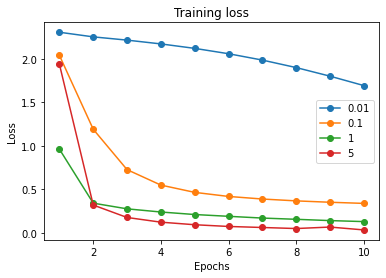

In [6]:
for hist, lr in zip(history, learning_rates):
    loss = hist.history['loss']
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, 'o-', label=lr)
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

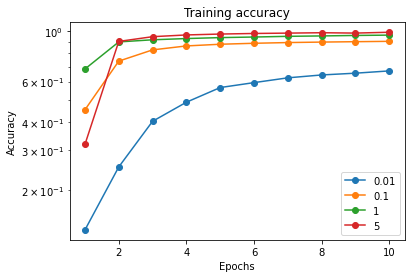

In [7]:
for hist, lr in zip(history, learning_rates):
    loss = hist.history['accuracy']
    epochs = range(1, len(loss) + 1)
    plt.semilogy(epochs, loss, 'o-', label=lr)
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

¿Cuál learning rate obtuvo mejores resultados? 

Compare con la gráfica que vimos en clase sobre cómo seleccionar un buen learning rate.

Se observa que para la tasa de aprendizaje de 5 se tiene una menor perdida y una mayor presición comparado con las otras tasas usadas. En este caso se logro el minimo y maximo de estos indicadores, respectivamente, en la epoch 8 y 10.

# Hacer lo mismo modificando solo el parámetro batch_size

Usar la misma configuración de red neuronal con learning rate = 1

Después graficar la pérdida y el accuracy para cada batch_size

--------------------------------------------------
Training with lr: 0.01  and batch size 64
Epoch 1/10
60000/60000 [==============================] - 4s 74us/step - loss: 2.2422 - accuracy: 0.2994
Epoch 2/10
60000/60000 [==============================] - 4s 69us/step - loss: 2.0267 - accuracy: 0.5732
Epoch 3/10
60000/60000 [==============================] - 4s 73us/step - loss: 1.6577 - accuracy: 0.6615
Epoch 4/10
60000/60000 [==============================] - 4s 70us/step - loss: 1.2642 - accuracy: 0.7240
Epoch 5/10
60000/60000 [==============================] - 4s 68us/step - loss: 0.9923 - accuracy: 0.7715
Epoch 6/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.8224 - accuracy: 0.8050
Epoch 7/10
60000/60000 [==============================] - 4s 68us/step - loss: 0.7101 - accuracy: 0.8260
Epoch 8/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.6314 - accuracy: 0.8418
Epoch 9/10
60000/60000 [==============================] - 5s 78us/s

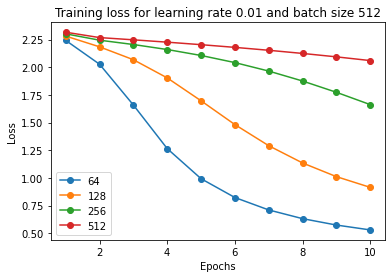

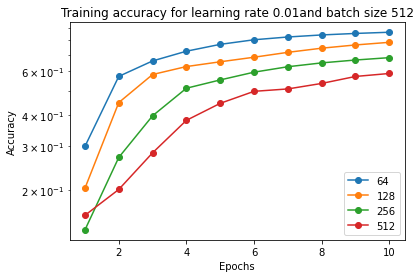

--------------------------------------------------
Training with lr: 0.1  and batch size 64
Epoch 1/10
60000/60000 [==============================] - 5s 76us/step - loss: 1.1214 - accuracy: 0.7049
Epoch 2/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.4182 - accuracy: 0.8841
Epoch 3/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.3415 - accuracy: 0.9020
Epoch 4/10
60000/60000 [==============================] - 5s 75us/step - loss: 0.3089 - accuracy: 0.9099
Epoch 5/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.2876 - accuracy: 0.9156
Epoch 6/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.2710 - accuracy: 0.9206
Epoch 7/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.2570 - accuracy: 0.9243
Epoch 8/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.2439 - accuracy: 0.9287
Epoch 9/10
60000/60000 [==============================] - 4s 72us/st

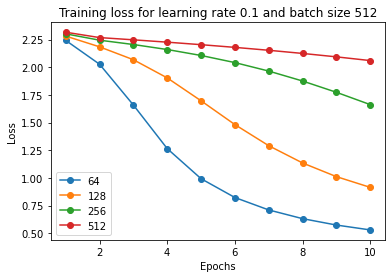

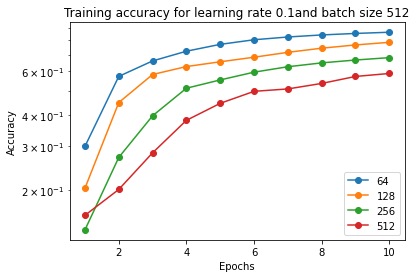

--------------------------------------------------
Training with lr: 1  and batch size 64
Epoch 1/10
60000/60000 [==============================] - 4s 74us/step - loss: 0.5441 - accuracy: 0.8217
Epoch 2/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.2078 - accuracy: 0.9374
Epoch 3/10
60000/60000 [==============================] - 5s 75us/step - loss: 0.1488 - accuracy: 0.9551
Epoch 4/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.1136 - accuracy: 0.9655
Epoch 5/10
60000/60000 [==============================] - 4s 74us/step - loss: 0.0913 - accuracy: 0.9729
Epoch 6/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.0744 - accuracy: 0.9774
Epoch 7/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.0614 - accuracy: 0.9812
Epoch 8/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.0518 - accuracy: 0.9844
Epoch 9/10
60000/60000 [==============================] - 4s 70us/step

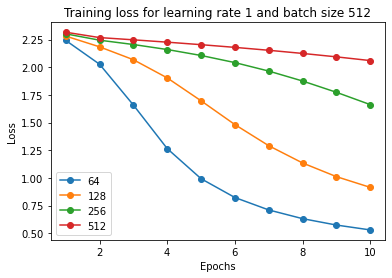

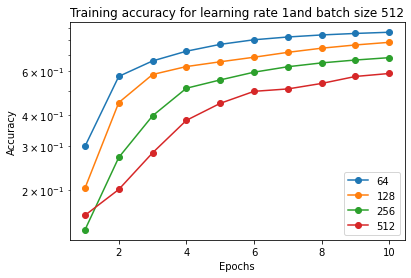

--------------------------------------------------
Training with lr: 5  and batch size 64
Epoch 1/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.8800 - accuracy: 0.6956
Epoch 2/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.1454 - accuracy: 0.9566
Epoch 3/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.0930 - accuracy: 0.9718
Epoch 4/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.0663 - accuracy: 0.9793
Epoch 5/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.0538 - accuracy: 0.9830
Epoch 6/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.0402 - accuracy: 0.9873
Epoch 7/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.0307 - accuracy: 0.9904
Epoch 8/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.0257 - accuracy: 0.9918
Epoch 9/10
60000/60000 [==============================] - 4s 72us/step

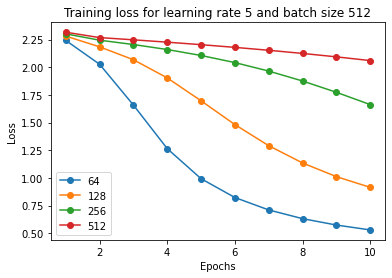

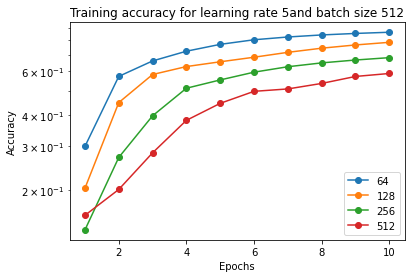

In [18]:
batch_size = [64, 128, 256, 512]
learning_rates = [.01, .1, 1, 5]
history = []
for lr in learning_rates:
    for bs in batch_size:

        network = models.Sequential()
        network.add(layers.Dense(512, activation='sigmoid', input_shape=(28 * 28,)))
        network.add(layers.Dense(64, activation='sigmoid'))
        network.add(layers.Dense(10, activation='softmax'))

        optimizer = SGD(lr=lr)
        network.compile(optimizer=optimizer,
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])
        print("-" * 50)
        print("Training with lr:", lr, " and batch size", bs)
        hist = network.fit(train_images, train_labels, epochs=10, batch_size=bs, verbose=1)
        history.append(hist)
    for hist, bz in zip(history, batch_size):
        loss = hist.history['loss']
        epochs = range(1, len(loss) + 1)
        plt.plot(epochs, loss, 'o-', label=bz)
    tit1='Training loss for learning rate '+ str(lr) + " and batch size " + str(bs)
    plt.title(tit1)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    for hist, bz in zip(history, batch_size):
        loss = hist.history['accuracy']
        epochs = range(1, len(loss) + 1)
        plt.semilogy(epochs, loss, 'o-', label=bz)
    tit2='Training accuracy for learning rate '+str(lr)+ " and batch size " + str(bs)
    plt.title(tit2)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

- ¿Con qué valores de batch size se reduce más la pérdida? ¿Por qué?

- ¿Con qué valores de batch size tarda menos el entrenamiento?

En general parece que el tamaño de "lote" o muestras 64, tiene menores perdidas y mayores presiciones. Lo que pude encontrar es que un mayor batch size requiere de un mayor número de epochs o iteraciones para converger, debido a que un mayor batch size probablemente se quedara atascado en un minimo local mientras lotes más pequeños no necesariamente [1]. Otra posible razón es que un mayor tamaño de muestra tenga problemas para generalizar [2].

Por otro lado, este mismo tamaño es el que tarda más en el entrenamiento de cada epoch. Pero no me queda porque pasa esto.

### Referencias
#### [1] https://datascience.stackexchange.com/questions/12532/does-batch-size-in-keras-have-any-effects-in-results-quality
#### [2] https://stats.stackexchange.com/questions/164876/what-is-the-trade-off-between-batch-size-and-number-of-iterations-to-train-a-neu